- 지속적인 아카이빙은 WAL 세그먼트 전환이 발생한 시점에 WAL 세그먼트 파일을 아카이브 영역에 복사하는 기능
  - 아카이버(백그라운드) 프로세스 에 의해 수행됨
  - 복사된 파일을 아카이브 로그 라고 함 .
  - 이 기능은 일반적으로핫 물리적 백업 및 PITR(Point-in-Time Recovery)에 사용됨 .


<BR>

- 아카이브 영역에 대한 경로는 'archive_command' 구성 매개변수에 의해 설정됨.
- 예를 들어 다음 매개변수는 세그먼트 전환이 발생할 때마다 WAL 세그먼트 파일을 '/home/postgres/archives/' 디렉터리에 복사.



```
archive_command = 'cp %p /home/postgres/archives/%f'
```

- 여기서 '%p' 자리 표시자는 복사된 WAL 세그먼트를 나타내고 '%f' 자리 표시자는 아카이브 로그를 나타냄.



**Continuous archiving.**

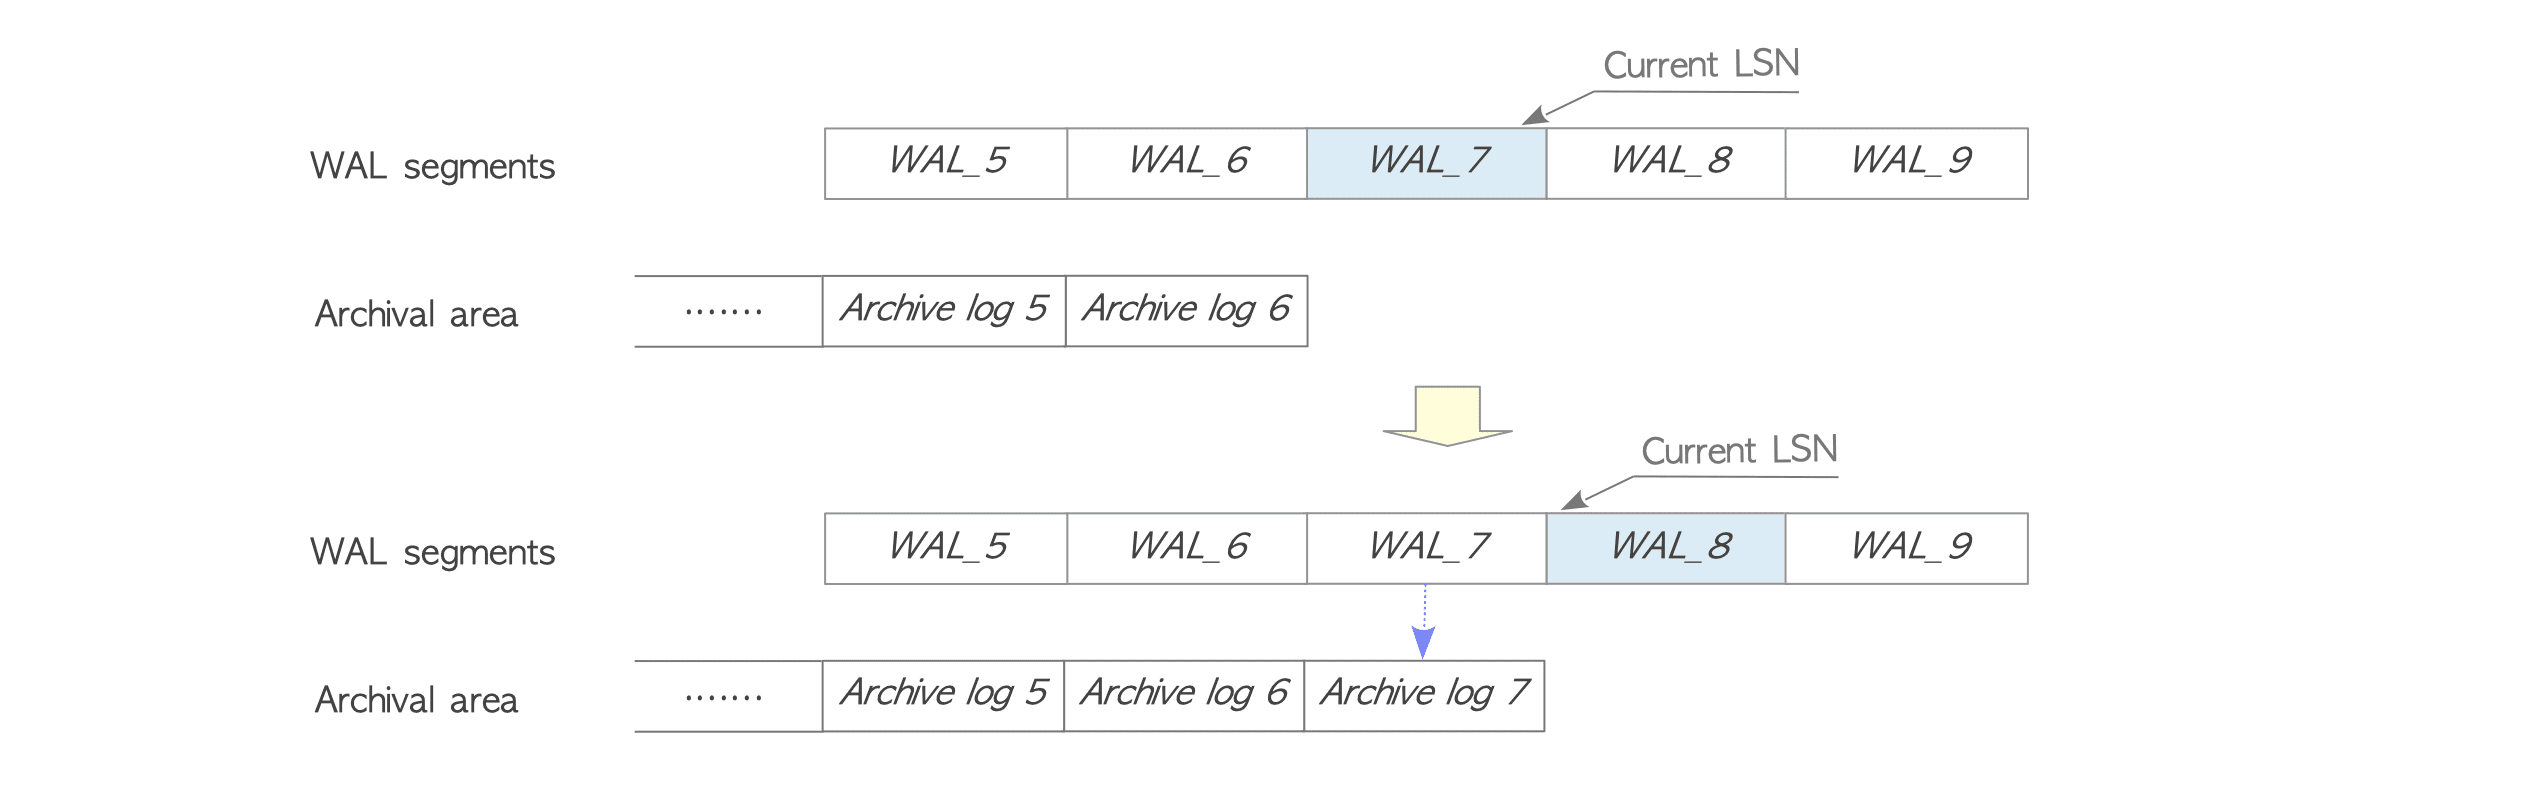

- WAL 세그먼트 파일 WAL_7이 전환되면 해당 파일은 Archive log 7로 아카이브 영역에 복사됨.

- 'archive_command' 매개변수는 모든 Unix 명령이나 도구로 설정할 수 있음.
  - 이는 간단한 복사 명령을 사용하는 대신 scp 명령이나 다른 파일 백업 도구를 사용하여 아카이브 로그를 다른 호스트로 전송할 수 있음을 의미.

<BR>

**archive_library**
- 버전 14 이하에서는 연속 보관에 셸 명령만 사용할 수 있었음.

- 버전 15에서 PostgreSQL은 라이브러리를 사용하여 지속적인 보관을 달성할 수 있는 로드 가능한 라이브러리 기능을 도입.

<BR>

**Memo**
- PostgreSQL은 생성된 아카이브 로그를 자동으로 정리하지 않음.
  - 따라서 이 기능을 사용할 때에는 로그를 적절하게 관리해야 함.
  - 아무것도 하지 않으면 보관 로그 수가 계속해서 늘어남.

- pg_archivecleanup 유틸리티 는 아카이브 로그 파일을 관리하는 데 유용한 도구 중 하나임.

- find 명령을 사용하여 보관 로그를 삭제할 수도 있음
  - 예를 들어 다음 명령은 생성된 지 3일이 지난 모든 보관 로그를 삭제.



```
$ find /home/postgres/archives -mtime +3d -exec rm  -f {} \;
```